<img align="right" src="https://druggablegenome.net/IDG_Images_Index/IDGLOGO.png" width="400">
# Pharos API Introduction
 * https://pharos.nih.gov
 * https://pharos.nih.gov/api
 * https://spotlite.nih.gov/ncats/pharos/snippets (Dac Trung Ngyuen)

### Imports and BASE_URL

In [0]:
import sys, json, urllib.request
import pandas
import matplotlib.pyplot
import altair #Ok for Colaboratory, not GitHub
BASE_URL = 'https://pharos.nih.gov/idg/api/v1'

### List target Collections:

In [2]:
req = urllib.request.urlopen(BASE_URL + '/targets/Collection/termvec')
termvec = json.loads(req.read())
for i,term in enumerate(termvec['terms']):
  tids = termvec['terms'][term]['docs'] #target IDs
  print("%d. TERM: \"%s\" (%d targets)"%(i+1, term, len(tids)))

1. TERM: "GPCR: IDG Consortium (Complete/Control)" (25 targets)
2. TERM: "GPCR: IDG Consortium (Targets)" (126 targets)
3. TERM: "Ion Channel: IDG Consortium (Targets)" (99 targets)
4. TERM: "Kinase: IDG Consortium (Complete/Control)" (37 targets)
5. TERM: "Kinase: IDG Consortium (Targets)" (125 targets)
6. TERM: "RFA-RM-18-021" (328 targets)


### Fetch collection of IDG high-priority targets: 

In [0]:
term = 'RFA-RM-18-021'
tids = termvec['terms'][term]['docs']
tgts = []
for tid in tids:
  req = urllib.request.urlopen(BASE_URL+'/targets('+str(tid)+')')
  tgts.append(json.loads(req.read().decode('utf8')))

### Dataframe with useful columns, indexed by target ID.

In [4]:
targets = pandas.DataFrame(tgts)
for col in targets.columns:
  if col.startswith('_'): targets.drop(columns=col, inplace=True)
targets.drop(columns=['self','kind','created','modified','deprecated','version','description','grantCount','grantTotalCost','pubmedCount','r01Count'], inplace=True)
targets.set_index('id', inplace=True, drop=True)
targets.head()

,accession,antibodyCount,gene,idgFamily,idgTDL,jensenScore,knowledgeAvailability,monoclonalCount,name,novelty,patentCount,ppiCount,pubTatorScore
id,,,,,,,,,,,,,
11776,Q5VT99,65,LRRC38,Ion Channel,Tbio,0.342857,15.155282,0,Leucine-rich repeat-containing protein 38,0.346787,45.0,NaN,-0.397940
3584,Q9UHX3,312,ADGRE2,GPCR,Tbio,48.242262,22.803360,106,Adhesion G protein-coupled receptor E2,-1.678620,4278.0,NaN,1.581344
9219,P51957,142,NEK4,Kinase,Tbio,11.450436,36.821608,26,Serine/threonine-protein kinase Nek4,-1.155839,5073.0,NaN,1.113572
6147,Q07001,155,CHRND,Ion Channel,Tclin,18.911755,29.076582,11,Acetylcholine receptor subunit delta,-1.301542,853.0,54.0,1.077485
9735,P49761,126,CLK3,Kinase,Tchem,28.522975,40.595501,38,Dual specificity protein kinase CLK3,-1.493624,2501.0,38.0,0.923704


### Counts and stats:

In [5]:
targets.idgFamily.value_counts()

Kinase         125
GPCR           102
Ion Channel    101
Name: idgFamily, dtype: int64

In [6]:
targets.idgTDL.value_counts()

Tbio     125
Tchem    110
Tdark     70
Tclin     23
Name: idgTDL, dtype: int64

In [7]:
targets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 11776 to 17407
Data columns (total 13 columns):
accession                328 non-null object
antibodyCount            328 non-null int64
gene                     328 non-null object
idgFamily                328 non-null object
idgTDL                   328 non-null object
jensenScore              328 non-null float64
knowledgeAvailability    328 non-null float64
monoclonalCount          328 non-null int64
name                     328 non-null object
novelty                  314 non-null float64
patentCount              313 non-null float64
ppiCount                 116 non-null float64
pubTatorScore            318 non-null float64
dtypes: float64(6), int64(2), object(5)
memory usage: 35.9+ KB


In [8]:
targets.describe().round(2)

,antibodyCount,jensenScore,knowledgeAvailability,monoclonalCount,novelty,patentCount,ppiCount,pubTatorScore
count,328.00,328.00,328.00,328.00,314.00,313.00,116.00,318.00
mean,136.90,19.25,27.50,16.30,-0.96,3124.35,13.94,0.87
std,84.12,52.92,10.15,26.73,0.57,4552.48,19.31,0.58
min,0.00,0.00,0.00,0.00,-2.70,45.00,1.00,-1.18
25%,77.00,3.24,20.90,1.00,-1.34,795.00,2.00,0.52
50%,126.00,9.77,28.03,3.00,-1.01,1727.00,4.50,0.93
75%,179.25,21.01,34.92,21.25,-0.58,3286.00,16.25,1.28
max,592.00,881.04,54.46,215.00,1.20,42817.00,84.00,2.44


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


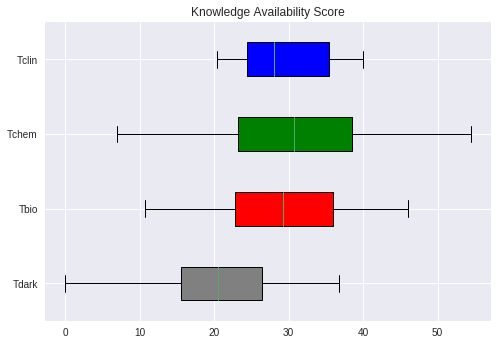

In [9]:
tdls = ["Tdark", "Tbio", "Tchem", "Tclin"]
tdl_colors = ["gray", "red", "green", "blue"]
data = [targets.knowledgeAvailability[targets.idgTDL==tdl] for tdl in tdls]
fig, ax = matplotlib.pyplot.subplots()
ax.set_title('Knowledge Availability Score')
plot = ax.boxplot(data, labels=tdls, vert=False, patch_artist=True)
for patch, color in zip(plot['boxes'], tdl_colors):
  patch.set_facecolor(color)
matplotlib.pyplot.show()

### Knowledge Availability Score distributions plot

In [10]:
lower_box = 'q1(knowledgeAvailability):Q'
lower_whisker = 'min(knowledgeAvailability):Q'
upper_box = 'q3(knowledgeAvailability):Q'
upper_whisker = 'max(knowledgeAvailability):Q'
tdls = ['Tdark','Tbio', 'Tchem', 'Tclin']
palette = altair.Scale(domain=tdls, range=['gray', 'red', 'green', 'blue'])
colors = altair.Color('idgTDL', scale=palette)
plot = altair.Chart(targets, title="Knowledge Availability Score (KAS)").mark_rule().encode(
    x=altair.X(lower_whisker, axis=altair.Axis(title="KAS")),
    x2=lower_box,
    y=altair.Y('idgTDL', sort=tdls)
)
plot += altair.Chart(targets).mark_bar(size=10).encode(
    x=lower_box,
    x2=upper_box,
    y=altair.Y('idgTDL', sort=tdls),
    color=colors
)
plot += altair.Chart(targets).mark_rule().encode(
    x=upper_whisker,
    x2=upper_box,
    y=altair.Y('idgTDL', sort=tdls),
    color=colors
)
plot += altair.Chart(targets).mark_tick(color='white', size=10).encode(
    x='median(knowledgeAvailability):Q',
    y=altair.Y('idgTDL', sort=tdls)
)
plot

LayerChart({
  layer: [Chart({
    data:       accession  antibodyCount      gene    idgFamily idgTDL  jensenScore  \
    id                                                                          
    11776    Q5VT99             65    LRRC38  Ion Channel   Tbio     0.342857   
    3584     Q9UHX3            312    ADGRE2         GPCR   Tbio    48.242262   
    9219     P51957            142      NEK4       Kinase   Tbio    11.450436   
    6147     Q07001            155     CHRND  Ion Channel  Tclin    18.911755   
    9735     P49761            126      CLK3       Kinase  Tchem    28.522975   
    15882    Q8TDT2            107    GPR152         GPCR   Tbio    41.777355   
    4618     Q9BY21            166     GPR87         GPCR  Tchem    14.152447   
    18956    Q96L42             64     KCNH8  Ion Channel  Tclin     4.854944   
    4621     Q9BY15            239    ADGRE3         GPCR   Tbio     5.480189   
    6158     Q6P5Z2            133      PKN3       Kinase   Tbio    15.532335   
    14863    P19784            218   CSNK2A2       Kinase  Tchem   221.259226   
    18961    Q9UEE5            263    STK17A       Kinase  Tchem    10.437352   
    7185     Q8IV77             67     CNGA4  Ion Channel   Tbio     9.223874   
    9234     Q8NG66            155     NEK11       Kinase  Tchem     5.520014   
    16914    Q8N165             85    PDIK1L       Kinase  Tdark     1.961803   
    6675     Q6ZSA7             10    LRRC55  Ion Channel   Tbio     1.542857   
    10771    Q7Z402             42      TMC7  Ion Channel   Tbio     0.469780   
    10773    Q7Z404              0      TMC4  Ion Channel  Tdark     1.758676   
    13846    P22694            308    PRKACB       Kinase  Tchem    23.612603   
    16409    O60307            106     MAST3       Kinase  Tchem     8.034141   
    7705     P24046            148    GABRR1  Ion Channel  Tchem    51.438093   
    17434    Q9BQ31             73     KCNS3  Ion Channel  Tclin    11.592118   
    7195     Q6P3W7            119     SCYL2       Kinase   Tbio     4.925879   
    13339    P58549            139     FXYD7  Ion Channel   Tbio     9.055555   
    2589     Q9BSA4             19     TTYH2  Ion Channel  Tdark     3.897727   
    7199     Q8IV63             63      VRK3       Kinase   Tbio     7.296859   
    9247     Q8NFU0             75     BEST4  Ion Channel   Tbio    24.891402   
    2594     Q9HCP0            224   CSNK1G1       Kinase  Tchem     3.217355   
    10786    Q06432            144    CACNG1  Ion Channel   Tbio     5.287589   
    2084     Q99755            121   PIP5K1A       Kinase   Tbio     5.875424   
    ...         ...            ...       ...          ...    ...          ...   
    6610     B7U540             43    KCNJ18  Ion Channel  Tdark     0.000000   
    19411    Q96L96             37     ALPK3       Kinase  Tdark     5.464286   
    13270    P60893            101     GPR85         GPCR   Tbio    21.133348   
    18391    Q6PIL6            147    KCNIP4  Ion Channel   Tbio    49.370884   
    16344    Q8TDN1             68     KCNG4  Ion Channel  Tclin     6.958670   
    11227    Q9H2B4             77   SLC26A1  Ion Channel   Tbio    18.829708   
    2525     Q13523            144    PRPF4B       Kinase  Tchem    14.733912   
    12253    Q5T3F8             27   TMEM63B  Ion Channel  Tdark     0.666666   
    8670     Q8IZE3            162     SCYL3       Kinase  Tdark     3.237720   
    479      Q9NY47            101  CACNA2D2  Ion Channel  Tclin    37.360880   
    5601     O94921            193     CDK14       Kinase  Tchem    25.443022   
    482      Q8WXS5             67    CACNG8  Ion Channel  Tdark     2.006926   
    17383    Q86SQ6             45    ADGRA1         GPCR  Tdark     2.999446   
    6124     Q8NE28            173    STKLD1       Kinase  Tdark     0.000000   
    11244    O75388            201     GPR32         GPCR  Tchem    10.791077   
    12782    O00418            319     EEF2K       Kinase  Tchem    25.1394